In [68]:
import numpy as np
import keras
from sklearn import datasets
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.utils.np_utils import to_categorical

[3 3 4 0 2 1 1 4 4 4 3 2 1 0 2 4 4 4 3 0 3 0 3 4 1 3 1 0 4 2 3 1 0 4 1 0 4
 0 4 0 1 3 3 0 3 1 3 4 0 4 0 2 3 0 2 4 4 0 3 4 1 3 0 4 2 1 1 2 3 2 3 2 1 1
 3 2 4 2 2 3 0 2 4 3 2 1 3 3 3 3 1 1 4 2 4 4 1 2 4 1 4 2 2 3 4 1 1 3 3 2 1
 3 1 0 1 0 4 4 4 3 1 3 3 3 1 4 4 0 2 0 1 1 0 4 0 1 1 4 4 0 4 3 4 4 2 4 0 0
 0 4 2 0 4 1 0 2 2 1 3 0 1 2 2 4 4 1 3 2 3 3 3 2 2 2 4 0 1 1 0 1 4 4 3 2 3
 2 3 1 0 3 4 2 1 0 0 0 4 3 0 4 2 2 3 1 0 4 4 1 2 1 3 1 4 4 0 1 4 2 4 0 4 0
 1 2 3 0 1 0 3 3 4 3 4 0 0 1 1 3 0 4 1 4 2 1 2 4 4 3 3 1 1 1 4 1 1 1 4 3 1
 0 0 2 2 2 3 2 3 4 2 3 3 1 1 0 4 0 3 0 0 0 3 2 2 1 4 2 0 0 2 2 1 3 3 1 3 0
 0 1 4 2 2 2 1 0 0 1 0 0 1 2 4 2 4 2 1 3 0 0 1 4 1 2 4 4 4 3 4 1 2 3 1 3 1
 0 0 2 4 1 3 1 1 2 1 4 3 1 2 3 2 0 4 1 4 0 2 2 0 1 2 2 4 4 0 4 1 3 3 2 2 0
 4 3 3 1 2 2 4 3 0 3 3 3 3 0 1 4 4 4 0 3 3 2 4 0 4 0 0 4 2 2 2 3 0 2 0 0 1
 2 3 0 0 2 4 2 3 0 3 0 1 0 4 1 0 0 1 3 1 4 0 2 1 1 3 2 3 2 2 2 3 1 0 0 0 1
 3 4 2 1 0 2 1 4 3 3 4 0 0 2 2 0 0 2 2 3 4 3 2 2 2 2 0 1 3 0 2 1 2 0 2 3 4
 3 1 4 3 3 0 2 4 0 4 1 3 

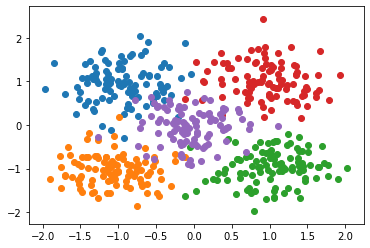

In [69]:
n_pts = 500
centers = [[-1, 1], [-1, -1], [1, -1], [1, 1], [0, 0]] #središta klastera podataka. Na početku je stavio samo tri.
X, y = datasets.make_blobs(n_samples=n_pts, random_state = 123, centers=centers, cluster_std=0.4) #Kreiram dataset i oznake
#n_sampels - broj točaka
#Omogućuje reproduciranja istog random data seta
#centers - referiramo se na kreiranu varijablu centers koja označva centre klastera
#cluster_std - ako sam dobro shvatio, namještamo raširenost podataka
 
plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])
plt.scatter(X[y==2, 0], X[y==2, 1])
plt.scatter(X[y==3, 0], X[y==3, 1])
plt.scatter(X[y==4, 0], X[y==4, 1]) #Prethodnih pet linija dohvaćaju i na graf ucrtavaju pet različtih klastera podataka.
 
print(y)
y_cat = to_categorical(y, 5) #oznake i broj klastera
#Kao što se ispod vidi, ova funkcija kodira prvotne oznake za klastere. 
#Pa je 3 => [0. 0. 0. 1. 0.]
print(y_cat)

In [70]:
model = Sequential()
model.add(Dense(5, input_shape=(2,), activation='softmax'))
model.compile(Adam(lr=0.01), 'categorical_crossentropy', metrics=['accuracy'])

In [71]:
#one hot encode output
history = model.fit(X, y_cat, verbose=1, batch_size = 50, epochs=100)

Epoch 1/100
500/500 [==============================] - 0s 83us/step - loss: 1.6331 - accuracy: 0.3300
Epoch 2/100
500/500 [==============================] - 0s 14us/step - loss: 1.4906 - accuracy: 0.4560
Epoch 3/100
500/500 [==============================] - 0s 14us/step - loss: 1.3652 - accuracy: 0.5240
Epoch 4/100
500/500 [==============================] - 0s 16us/step - loss: 1.2546 - accuracy: 0.5640
Epoch 5/100
500/500 [==============================] - 0s 16us/step - loss: 1.1597 - accuracy: 0.5760
Epoch 6/100
500/500 [==============================] - 0s 14us/step - loss: 1.0753 - accuracy: 0.6080
Epoch 7/100
500/500 [==============================] - 0s 18us/step - loss: 1.0030 - accuracy: 0.6740
Epoch 8/100
500/500 [==============================] - 0s 18us/step - loss: 0.9400 - accuracy: 0.7380
Epoch 9/100
500/500 [==============================] - 0s 16us/step - loss: 0.8846 - accuracy: 0.7840
Epoch 10/100
500/500 [==============================] - 0s 16us/step - loss: 0.836

Prediction is:  [4]


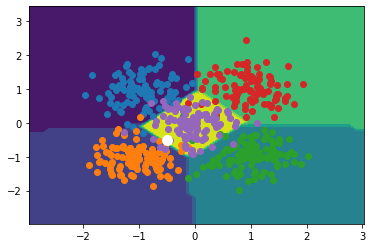

In [72]:
def plot_multiclass_decision_boundary(X, y, model):
    x_span = np.linspace(min(X[:,0]) - 1, max(X[:,0]) + 1)
    y_span = np.linspace(min(X[:,1]) - 1, max(X[:,1]) + 1)
    xx, yy = np.meshgrid(x_span, y_span)
    grid = np.c_[xx.ravel(), yy.ravel()]
    pred_func = model.predict_classes(grid)
    z = pred_func.reshape(xx.shape)
    plt.contourf(xx, yy, z)
    
plot_multiclass_decision_boundary(X, y_cat, model)

plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])
plt.scatter(X[y==2, 0], X[y==2, 1])
plt.scatter(X[y==3, 0], X[y==3, 1])
plt.scatter(X[y==4, 0], X[y==4, 1])
 
x = -0.5
y = -0.5
 
point = np.array([[x, y]])
prediction = model.predict_classes(point)
plt.plot([x], [y], marker='o', markersize=10, color="white")
print("Prediction is: ", prediction)